<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Librerias

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

# Problemas con Matrices 



##1. **Modelo de población de una especie de pajaros** 
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1) 
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros 
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que: 

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix} 
0 & 2 \\
0.3 & 0.5 
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n \left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n a_2 \vec{v}_2\right]
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A



In [2]:
# Matriz del modelo de recimiento de la poblacion de pajaros
A=np.array([[0,2],[0.3,0.5]])

#Vector de poblacion de hembras jovenes y adultas en el año n=0:
p_0=np.array([0,10])


In [3]:
p_1=np.floor(A@p_0) # Vector de poblacion de hembras jovenes y adultas en el año n=1
p_1

array([20.,  5.])

In [14]:
k=4
p_k = np.floor((linalg.matrix_power(A,k)) @ p_0)

print(f'Vector de poblacion de pajaros en el año n = {k}',' :',p_k)


Vector de poblacion de pajaros en el año n = 4  : [14.  8.]


In [13]:
# Se define la rutina llamada convergencia como la proporcion entre el numero de pajaros jovenes  y de pajaros adultos.

def convergencia(n):

  p_0=np.array([0,10])
  A=np.array([[0,2],[0.3,0.5]])

  q_array=np.zeros(n)

  for k in range(n):
    
    p_k = A@p_0
    #p_k=np.array(A@p_0)
    q=p_k[0]/p_k[1]
    q_array[k]=q
    p_0=p_k

  return q_array





#Rutina para el vector de la poblacion en el enesimo año:

def P(n):
  p_0=np.array([0,10])
  A=np.array([[0,2],[0.3,0.5]])
 
  p_n = np.floor((linalg.matrix_power(A,n)) @ p_0)

  return p_n




Para el año n = 50 ,  La razon entre el numero de pajaros jovenes y adultos converge a : 1.8798034326832374


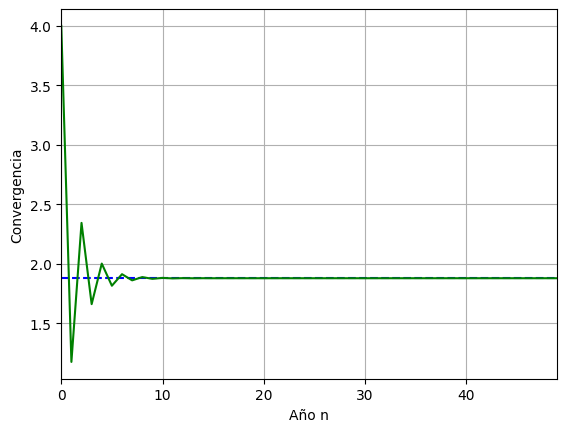

In [24]:
n=50
N=np.arange(0,n,1)
plt.plot(N,1.88*np.ones(n),'b--')
plt.plot(N,convergencia(n),color='green')
plt.xlabel('Año n')
plt.xlim(0,N[-1])
plt.ylabel('Convergencia')
plt.grid()

print (f'Para el año n = {n} ,',' La razon entre el numero de pajaros jovenes y adultos converge a :', convergencia(n)[-1])


In [43]:
#----------------------------------------------------------
#----------------------------------------------------------
#Solucion general mediante diagonalizacion matricial:

eigen_stuff=np.linalg.eig(A)

eigen_values=eigen_stuff[0]
eigen_vectors=eigen_stuff[1].T


l1, l2 = eigen_values

v1, v2 = eigen_vectors

print(f'valores propios: l1 = {l1} , l2 = {l2} ','\n')
print('v1=',v1,'\n','\n','v2=',v2)

valores propios: l1 = -0.5639410298049854 , l2 = 1.0639410298049854  

v1= [-0.96246998  0.27138816] 
 
 v2= [-0.88285203 -0.46965125]


In [ ]:
# Matriz cuyas que tiene por columnas los vectores propios de la matriz del modelo A:

U=np.array([v1,v2]).T

U_inv =linalg.inv(U)



In [ ]:
#Coeficientes a1 Y a2 en la base formada por el espacio de los vectores propios {v1,v2} :

Coef_array=np.linalg.solve(U,p_0)
a1, a2 = Coef_array



In [46]:
def pob_n(n,a1,a2,l1,l2,v1,v2):

  T1 = a1*v1 
  T2 = ((l2/l1)**n)*a2*v2
  T= (l1**n)*(T1 + T2)

  return T

n=50
a1, a2 = Coef_array
l1, l2 = eigen_values
v1, v2 = eigen_vectors

pob_n(n,a1,a2,l1,l2,v1,v2)

conv = pob_n(n,a1,a2,l1,l2,v1,v2)[0]/pob_n(n,a1,a2,l1,l2,v1,v2)[1]
print (f'Para el año n = {n} ,',' La razon entre el numero de pajaros jovenes y adultos converge a :', conv)

Para el año n = 50 ,  La razon entre el numero de pajaros jovenes y adultos converge a : 1.8798034326832371


##2. **Modelo de encriptación** 

Un proceso para encriptar un mensaje secreto, es usar cierta matriz cuadrada cuyos elementos sean enteros, con elementos enteros en su inversa.
 Se recibe un mensaje, se asigna un número a cada letra(por ejemplo: A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo,luego  se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje. 

La persona que debe recibir el mensaje conoce la matriz de codigo. El o ella arreglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila,  donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?

In [ ]:
# Asignacion de valores numericos a las letras del alfabeto


alfabeto='ABCDEFGHIJKLMNOPQRSTUVWXYZ '

indice_a_letra=dict(zip(range(1,len(alfabeto)+1),alfabeto))

print(indice_a_letra)



{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 27: ' '}


In [ ]:
# Definir la Matriz clave dada en el problema:


A=np.array([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])


print(A)

[[ 1  2 -3  4  5]
 [-2 -5  8 -8 -9]
 [ 1  2 -2  7  9]
 [ 1  1  0  6 12]
 [ 2  4 -6  8 11]]


In [ ]:
# Definir la inversa de la matriz A:

inv_A=linalg.inv(A)
print(inv_A)

[[ 14.   1.  -2.   1.  -5.]
 [ 22.  -7.  -4.   6. -19.]
 [ 13.  -3.  -2.   3. -10.]
 [ -2.   1.   1.  -1.   2.]
 [ -2.  -0.  -0.  -0.   1.]]


In [ ]:
# Tomamos el mensaje encriptado y lo descomponemos en una matriz cuyo numero de columnass coincida con la dimension de la matriz llave, 

msj=np.array([47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588])


arrays_enc = np.split(msj,(len(msj)//len(A)))


B = np.array([arrays_enc[0],arrays_enc[1],arrays_enc[2],arrays_enc[3]]) # Matriz del mensaje encriptado
print(B)

[[  47   49  -19  257  487]
 [  10   -9   63  137  236]
 [  79  142 -184  372  536]
 [  59   70  -40  332  588]]


In [ ]:
# Multiplicamos la matriz b yla inversa de A por derecha:

M = B @ inv_A
print(M)

[[ 1. 18.  5. 27. 25.]
 [15. 21. 27.  8.  1.]
 [22.  9. 14.  7. 27.]
 [ 6. 21. 14. 27. 27.]]


In [ ]:
M=M.flatten() # Convertimos la matriz resultante del proceso de decodificacion en un arrglo unidimensional:
M = np.round(M).astype(int) # Redondear las entradas del array al valor entero mas cercano.
M

array([ 1, 18,  5, 27, 25, 15, 21, 27,  8,  1, 22,  9, 14,  7, 27,  6, 21,
       14, 27, 27])

In [ ]:
msj_txt=[indice_a_letra[k] for k in M]
print(msj_txt)


['A', 'R', 'E', ' ', 'Y', 'O', 'U', ' ', 'H', 'A', 'V', 'I', 'N', 'G', ' ', 'F', 'U', 'N', ' ', ' ']


##3. **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 
a) Diagonalize $A$.<br> 

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.<br>.
c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.<br> 
d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$


In [ ]:
#Definamos la matriz A de coeficientes del sistema de ecuaciones diferenciales:

A=np.array([[2,-1,1],
            [0,3,-1],
            [2,1,3]])
A

array([[ 2, -1,  1],
       [ 0,  3, -1],
       [ 2,  1,  3]])

In [ ]:
# a) Diagonalizacion de la matriz A :

eigvaluesA , eigvectorsA  = np.linalg.eigh(A)

U= eigvectorsA  # Matriz cuyas columnas son los vectores propios de A

U_inv=np.linalg.inv(U)
U_inv

D=np.diag(eigvaluesA)
D



array([[0.29072464, 0.        , 0.        ],
       [0.        , 2.80606343, 0.        ],
       [0.        , 0.        , 4.90321193]])

In [ ]:
# Usar el hecho de que:  f(A) = U f(D) U`−1 ,  para encontrar  x(t),y(t),z(t)  en el intervalo de tiempo  [0,2] .


t=np.linspace(0,2,1000)
r0=np.array([1,1,2])

r_sol=np.zeros((len(t),3))

def f(X):
  f=np.exp(X)
  return f

for i,ti in enumerate(t):

  f_exp = f(D*ti)
  r = (U @ f_exp @ U_inv) @ r0
  r_sol[i] = r

r_sol                            # vector de solucion con tantas filas como instantes temporales y de 3 columnas




array([[-1.83169773e+00,  2.98299412e+00,  3.44779313e+00],
       [-1.81962540e+00,  2.99305238e+00,  3.46589961e+00],
       [-1.80743163e+00,  3.00320777e+00,  3.48418419e+00],
       ...,
       [ 2.24941688e+04,  1.71990989e+04,  3.26732039e+04],
       [ 2.27161526e+04,  1.73686242e+04,  3.29955168e+04],
       [ 2.29403266e+04,  1.75398210e+04,  3.33210093e+04]])

In [ ]:
x_1 = r_sol[:,0]
y_1 = r_sol[:,1]
z_1 = r_sol[:,2]



In [ ]:
#Solucion analitica:

t=np.linspace(0,2,1000)
r0=np.array([1,1,2])

x_2=0.5 *(r0[0]*( np.exp(2*t)*(1 + np.exp(2*t)-2*t))    +  r0[1]*(-2*t*np.exp(2*t))     +   r0[2]*(np.exp(2*t)*(np.exp(2*t) - 1)))
y_2=0.5 *(r0[0]*( np.exp(-2*t)*(-1 + np.exp(2*t)-2*t))  +  r0[1]*(2*(t+1)*np.exp(2*t))  +   r0[2]*(np.exp(2*t)*(-np.exp(2*t) +1)))
z_2=0.5 *(r0[0]*( np.exp(2*t)*(-1 + np.exp(2*t)-2*t))   +  r0[1]*(2*t*np.exp(2*t))      +   r0[2]*(np.exp(2*t)*(np.exp(2*t) + 1)))

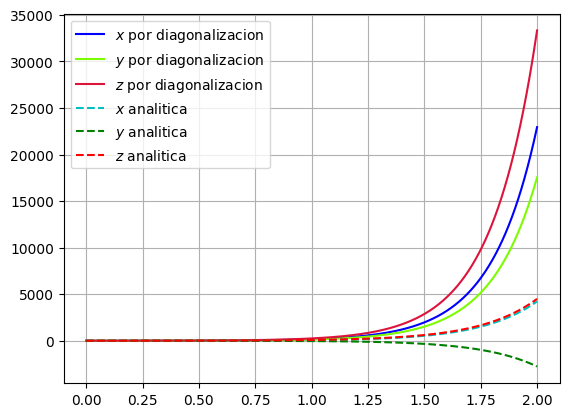

In [ ]:
plt.plot(t,x_1,color='blue',label='$ x $ por diagonalizacion')
plt.plot(t,y_1,color='lawngreen',label='$ y $ por diagonalizacion')
plt.plot(t,z_1,color='crimson',label='$ z $ por diagonalizacion')
plt.plot(t,x_2,'c--',label='$ x $ analitica')
plt.plot(t,y_2,'g--',label='$ y $ analitica')
plt.plot(t,z_2,'r--',label='$ z $ analitica')
plt.grid()
plt.legend()

In [ ]:
enumerate?